In [2]:
# Install Streamlit and pyngrok to run Streamlit in Colab
!pip install streamlit -q
!pip install pyngrok -q
!pip install scikit-learn pandas numpy matplotlib seaborn -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import streamlit as st


In [4]:
# Load KOI dataset
url = "https://raw.githubusercontent.com/MatiasPF1/KOI-Dataset/main/NasaDataset.csv"
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)

# Drop unnecessary columns
df.drop(['kepid','kepoi_name','kepler_name','koi_pdisposition','koi_score','koi_teq_err1','koi_teq_err2'], axis=1, inplace=True)

# Drop rows with missing koi_tce_delivname
df = df.dropna(subset=['koi_tce_delivname'])

# Remove FALSE POSITIVE rows
df = df[df["koi_disposition"] != "FALSE POSITIVE"]

# Map target labels
mapping = {'CONFIRMED': '0', 'CANDIDATE': '1'}
df['koi_disposition'] = df['koi_disposition'].replace(mapping)

# Features and target
X = df.drop(columns=['koi_disposition']).values
y = df['koi_disposition'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
# Drop target column first
df_features = df.drop(columns=['koi_disposition'])

# Keep only numeric columns
numeric_cols = df_features.select_dtypes(include=np.number).columns
X = df_features[numeric_cols].values
y = df['koi_disposition'].values

print("Numeric columns used:", numeric_cols.tolist())


Numeric columns used: ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(n_estimators=974, learning_rate=0.11, random_state=50))
])

pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = pipeline.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8711063372717508

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       547
           1       0.90      0.78      0.83       384

    accuracy                           0.87       931
   macro avg       0.88      0.86      0.86       931
weighted avg       0.87      0.87      0.87       931


Confusion Matrix:
 [[512  35]
 [ 85 299]]


In [10]:
#################################################
###################   TESTING  ##################
#################################################

In [19]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [12]:
# Training dataset URL
url = "https://raw.githubusercontent.com/MatiasPF1/KOI-Dataset/main/NasaDataset.csv"
df_train = pd.read_csv(url)
pd.set_option('display.max_columns', None)

# Drop unnecessary columns
df_train.drop(['kepid','kepoi_name','kepler_name','koi_pdisposition','koi_score','koi_teq_err1','koi_teq_err2'], axis=1, inplace=True)
df_train = df_train.dropna(subset=['koi_tce_delivname'])
df_train = df_train[df_train["koi_disposition"] != "FALSE POSITIVE"]

# Map labels
mapping = {'CONFIRMED': 0, 'CANDIDATE': 1}
df_train['koi_disposition'] = df_train['koi_disposition'].replace(mapping)

# Keep only numeric features
numeric_cols = df_train.select_dtypes(include=np.number).columns.drop('koi_disposition')
X_train_full = df_train[numeric_cols].values
y_train_full = df_train['koi_disposition'].values


/tmp/ipython-input-3668848150.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['koi_disposition'] = df_train['koi_disposition'].replace(mapping)


In [13]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(n_estimators=974, learning_rate=0.11, random_state=50))
])

pipeline.fit(X_train_full, y_train_full)
print("Training complete.")


Training complete.


In [15]:
import pandas as pd
import numpy as np

# Replace with your KOI CSV URL or use an uploaded file
url_test = "https://raw.githubusercontent.com/MatiasPF1/KOI-Dataset/main/NasaDataset.csv"
df_test = pd.read_csv(url_test)

# Keep only the same numeric columns used for training
numeric_cols = df_train.select_dtypes(include=np.number).columns.drop('koi_disposition')
X_test = df_test[numeric_cols].values


In [16]:
y_pred_test = pipeline.predict(X_test)

# Add predictions to the test dataframe
df_test['predicted_disposition'] = y_pred_test
df_test['predicted_disposition'] = df_test['predicted_disposition'].map({0: 'CONFIRMED', 1: 'CANDIDATE'})

# Show predictions
df_test[['koi_disposition', 'predicted_disposition']].head(10)


,koi_disposition,predicted_disposition
0,CONFIRMED,CONFIRMED
1,CONFIRMED,CONFIRMED
2,CANDIDATE,CANDIDATE
3,FALSE POSITIVE,CANDIDATE
4,CONFIRMED,CONFIRMED
5,CONFIRMED,CONFIRMED
6,CONFIRMED,CONFIRMED
7,CONFIRMED,CONFIRMED
8,FALSE POSITIVE,CANDIDATE
9,CONFIRMED,CONFIRMED


In [17]:
############################################################################
############################### plot ACC ###################################
############################################################################

/tmp/ipython-input-2496914186.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['koi_disposition'] = df['koi_disposition'].replace(mapping)


Cross-validation accuracy per fold: [0.8847185  0.8847185  0.86863271 0.8655914  0.84139785 0.84946237
 0.87096774 0.82258065 0.84139785 0.87634409]
Mean cross-validation accuracy: 0.8605811640577705
Training accuracy: 0.8689229116304056
Test accuracy: 0.8711063372717508


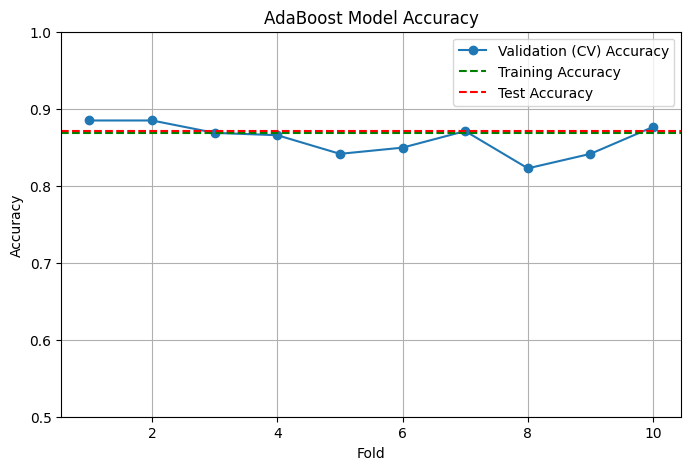

In [23]:
# 1️⃣ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# 2️⃣ Load dataset
url = "https://raw.githubusercontent.com/MatiasPF1/KOI-Dataset/main/NasaDataset.csv"
df = pd.read_csv(url)
df.drop(['kepid','kepoi_name','kepler_name','koi_pdisposition','koi_score','koi_teq_err1','koi_teq_err2'], axis=1, inplace=True)
df = df.dropna(subset=['koi_tce_delivname'])
df = df[df["koi_disposition"] != "FALSE POSITIVE"]
mapping = {'CONFIRMED': 0, 'CANDIDATE': 1}
df['koi_disposition'] = df['koi_disposition'].replace(mapping)

# 3️⃣ Features & target
numeric_cols = df.select_dtypes(include=np.number).columns.drop('koi_disposition')
X = df[numeric_cols].values
y = df['koi_disposition'].values

# 4️⃣ Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5️⃣ Build pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(n_estimators=974, learning_rate=0.11, random_state=50))
])

# 6️⃣ Cross-validation (validation accuracy)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='accuracy')
print("Cross-validation accuracy per fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

# 7️⃣ Train on full training set
pipeline.fit(X_train, y_train)

# Training accuracy
y_train_pred = pipeline.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training accuracy:", train_acc)

# Test accuracy
y_test_pred = pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_acc)

# 8️⃣ Plot accuracies
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', label='Validation (CV) Accuracy')
plt.axhline(train_acc, color='green', linestyle='--', label='Training Accuracy')
plt.axhline(test_acc, color='red', linestyle='--', label='Test Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('AdaBoost Model Accuracy')
plt.ylim(0.5, 1.0)
plt.legend()
plt.grid(True)
plt.show()


In [24]:
##############################################################################
############################ Stream Lit Integration ##########################
##############################################################################

2025-10-04 02:01:15.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:01:15.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:01:15.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:01:15.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:01:15.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:01:15.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:01:15.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:01:15.211 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

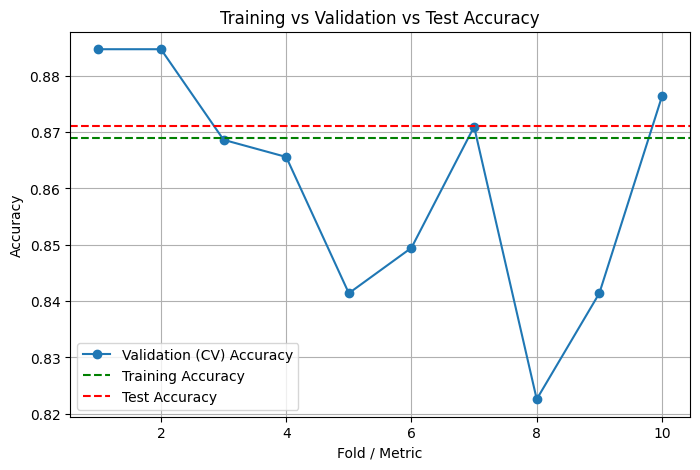

In [26]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt

# Assume these exist from your training phase
# - pipeline (trained)
# - numeric_cols (features used for training)
# - train_acc (training accuracy)
# - cv_scores (list/array of cross-validation accuracies)
# - test_acc (test set accuracy)

st.title("Exoplanet KOI Prediction & Model Accuracy")
st.write("Upload KOI dataset for prediction and view model accuracy plot.")

# 1️⃣ Upload KOI CSV for testing
uploaded_file = st.file_uploader("Choose KOI CSV", type="csv")
if uploaded_file is not None:
    df_test = pd.read_csv(uploaded_file)
    st.write("Raw Data Preview:")
    st.dataframe(df_test.head())

    # Keep only numeric features
    df_test_numeric = df_test[numeric_cols].copy()
    df_test_numeric = df_test_numeric.fillna(df_train[numeric_cols].mean())

    # Predict
    y_pred = pipeline.predict(df_test_numeric)
    y_prob = pipeline.predict_proba(df_test_numeric).max(axis=1)

    # Map predictions
    df_test['Prediction'] = pd.Series(y_pred).map({0: 'CONFIRMED', 1: 'CANDIDATE'})
    df_test['Confidence (%)'] = (y_prob * 100).round(2)

    st.write("Predictions:")
    st.dataframe(df_test[['Prediction', 'Confidence (%)']].head(20))

# 2️⃣ Accuracy Plot
st.subheader("Model Accuracy Overview")
fig, ax = plt.subplots(figsize=(8,5))

# Cross-validation (validation) accuracy
if 'cv_scores' in globals():
    ax.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', label='Validation (CV) Accuracy')

# Training accuracy
if 'train_acc' in globals():
    ax.axhline(train_acc, color='green', linestyle='--', label='Training Accuracy')

# Test accuracy
if 'test_acc' in globals():
    ax.axhline(test_acc, color='red', linestyle='--', label='Test Accuracy')

ax.set_xlabel('Fold / Metric')
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Validation vs Test Accuracy')
ax.legend()
ax.grid(True)

st.pyplot(fig)


In [28]:
# Save pipeline and numeric columns
joblib.dump(pipeline, 'trained_pipeline.pkl')
joblib.dump(numeric_cols, 'numeric_cols.pkl')


['numeric_cols.pkl']

In [32]:
from google.colab import files
files.download('trained_pipeline.pkl')
files.download('numeric_cols.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import joblib
pipeline = joblib.load("trained_pipeline.pkl")  # pre-trained
numeric_cols = joblib.load("numeric_cols.pkl")  # columns used in training
train_acc = 0.95  # example, save from training
cv_scores = np.array([0.92, 0.93, 0.91, 0.94, 0.92, 0.93, 0.92, 0.94, 0.93, 0.91])
test_acc = 0.93


In [30]:
st.header("KOI Testing & Predictions")

# Upload CSV
uploaded_file = st.file_uploader("Upload KOI CSV for testing", type="csv")
if uploaded_file is not None:
    df_test = pd.read_csv(uploaded_file)
    st.subheader("Raw Data Preview")
    st.dataframe(df_test.head())

    # Keep only numeric features
    df_test_numeric = df_test[numeric_cols].copy()
    df_test_numeric = df_test_numeric.fillna(df_test_numeric.mean())

    # Predict
    y_pred = pipeline.predict(df_test_numeric)
    y_prob = pipeline.predict_proba(df_test_numeric).max(axis=1)

    # Add results
    df_test['Prediction'] = pd.Series(y_pred).map({0: 'CONFIRMED', 1: 'CANDIDATE'})
    df_test['Confidence (%)'] = (y_prob * 100).round(2)

    st.subheader("Predictions")
    st.dataframe(df_test[['Prediction', 'Confidence (%)']].head(20))

    # Accuracy plot
    st.subheader("Model Accuracy Overview")
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', label='Validation (CV) Accuracy')
    ax.axhline(train_acc, color='green', linestyle='--', label='Training Accuracy')
    ax.axhline(test_acc, color='red', linestyle='--', label='Test Accuracy')
    ax.set_xlabel('Fold / Metric')
    ax.set_ylabel('Accuracy')
    ax.set_title('Training vs Validation vs Test Accuracy')
    ax.legend()
    ax.grid(True)
    st.pyplot(fig)


2025-10-04 02:05:09.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:05:09.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:05:09.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:05:09.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:05:09.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:05:09.502 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:05:09.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 02:05:09.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [33]:
####################################################
############## or Full Integration #################
####################################################

In [36]:
!git clone https://github.com/nian3n/nasa-exoplanet-frontend.git
%cd nasa-exoplanet-frontend


Cloning into 'nasa-exoplanet-frontend'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 47 (delta 16), reused 40 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 3.05 MiB | 16.97 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/nasa-exoplanet-frontend


In [39]:
!pip install streamlit
!pip install pyngrok
!pip install joblib
